## Лабораторная работа 4
## Математичекая морфология
## Котов И. Ю.
## РИМ-181226

In [2]:
from skimage.io import imread, imshow, imsave
from skimage import img_as_float, img_as_int, img_as_ubyte
from skimage.color import rgb2gray
from numpy import dstack, roll, clip, hstack
from numpy import histogram
import numpy as np
from skimage.morphology import (closing, opening,binary_closing, binary_opening,binary_erosion, binary_dilation,erosion, dilation, diamond, disk, rectangle, square, star)
import matplotlib.pyplot as plt
from skimage.filters import rank
import io
from itertools import groupby

%matplotlib inline

## Нанахождение внутренних и внешних границ изображений

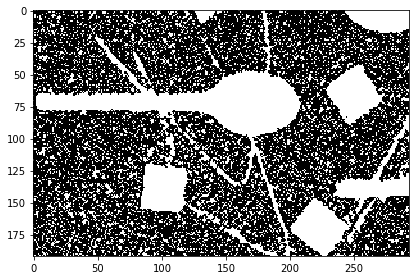

In [6]:
img1 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\1.png',1)
imshow(img1)

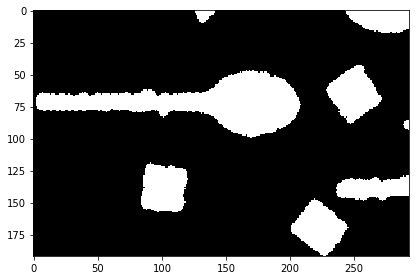

In [16]:
imshow(dilation(erosion(img1, disk(3)),  disk(3)))

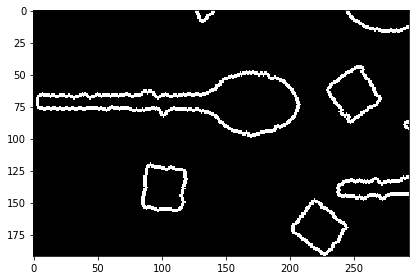

In [20]:
imshow(dilation(erosion(img1, disk(3)),  disk(3)) - erosion(img1,  disk(3))) 

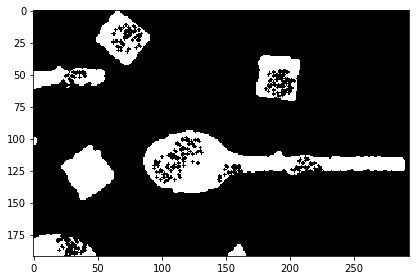

In [23]:
img2 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\2.png',1)
imshow(img2)

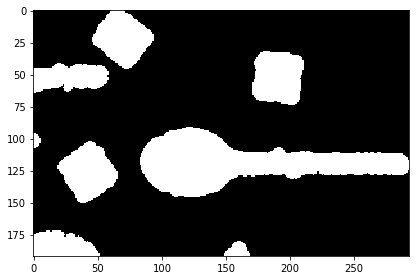

In [28]:
imshow(dilation(erosion(dilation(img2, disk(3)), disk(3)),  disk(3)))

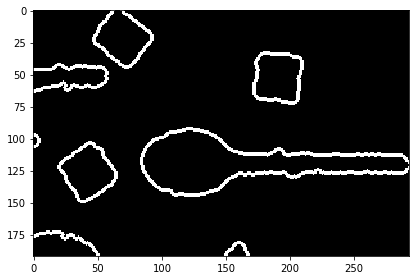

In [29]:
imshow(dilation(erosion(dilation(img2, disk(3)), disk(3)),  disk(3)) - erosion(dilation(img2, disk(3)),  disk(3))) 

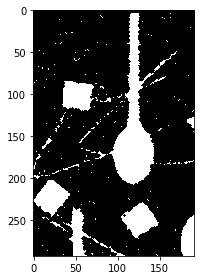

In [30]:
img3 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\3.png',1)
imshow(img3)

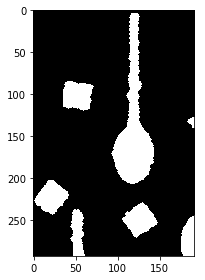

In [32]:
imshow(dilation(erosion(img3, disk(3)),  disk(3)))

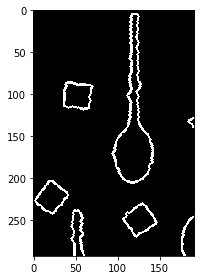

In [33]:
imshow(dilation(erosion(img3, disk(3)),  disk(3)) - erosion(img3,  disk(3))) 

## Удаление шума с изображений

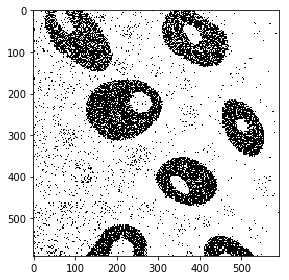

In [34]:
img4 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\4.png',1)
imshow(img4)

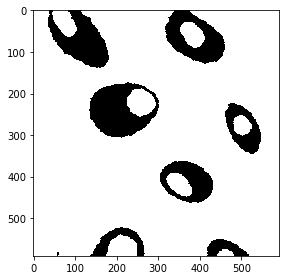

In [41]:
imshow(dilation(erosion(dilation(erosion(opening(img4, disk(3))), disk(9)), disk(3)),  disk(3)))

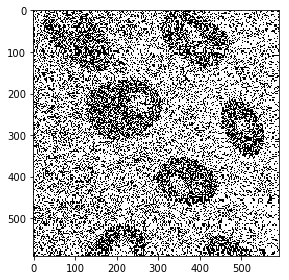

In [42]:
img5 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\5.png',1)
imshow(img5)

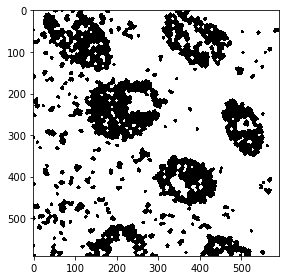

In [92]:
imshow(opening(closing(dilation(erosion(img5, disk(2)), disk(3)),disk(4))))

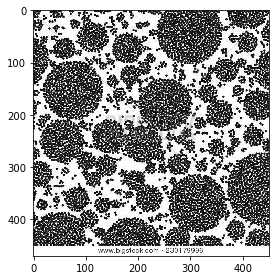

In [101]:
img6 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\6.jpg',1)
imshow(img6)

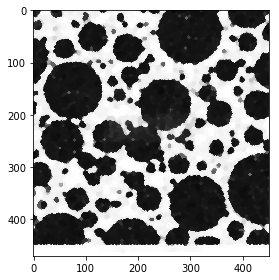

In [102]:
imshow(opening(closing(dilation(erosion(img6, disk(2)), disk(3)),disk(4))))

## Удаление шума с изображений c текстом¶

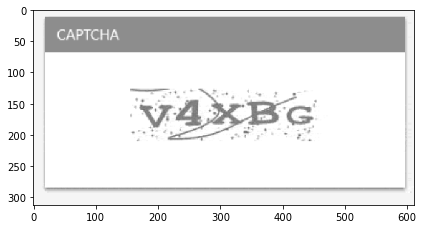

In [103]:
img7 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\7.png',1)
imshow(img7)

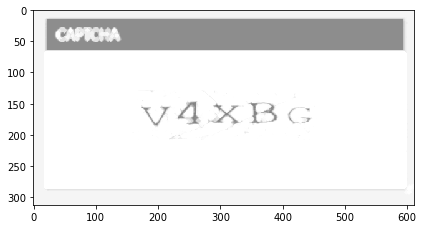

In [112]:
imshow(dilation(dilation(dilation(img7))))

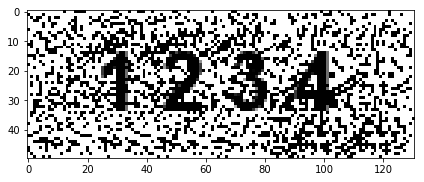

In [113]:
img8 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\8.png',1)
imshow(img8)

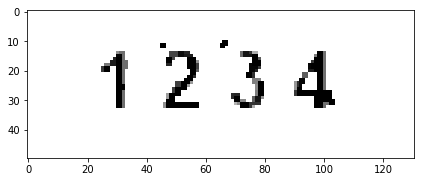

In [123]:
imshow(dilation(closing(img8,square(3)),square(2)))

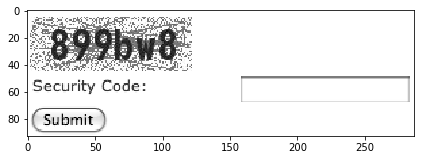

In [124]:
img9 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\9.png',1)
imshow(img9)

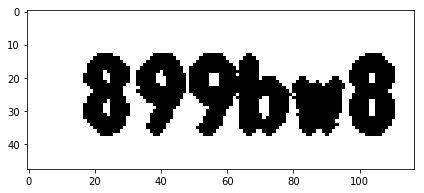

In [143]:
imshow(erosion(dilation(img9[:-45, :-170]>0.4), disk(2)))

## Определение возраста дерева по спилу

In [3]:
img10 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\10.jpg',1)
img11 = imread('C:\\Users\\Vanya\\Desktop\\2 семестр\\Анализ изображений\\images\\11.jpg',1)

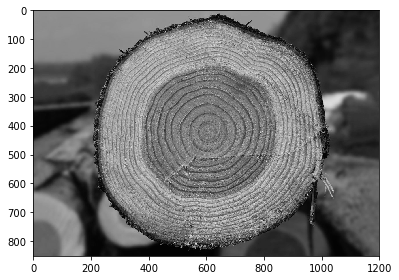

In [4]:
imshow(img10)

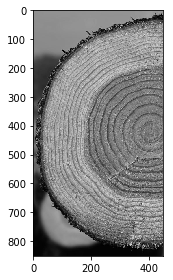

In [6]:
img10_half = rgb2gray(img10[:, 200:650])
imshow(img10_half)

Возраст дерева = :  21


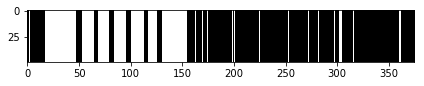

In [43]:
cut = img10_half[410:440, 25:400]

cut = binary_erosion(\
       np.array([\
        np.mean(\
         binary_erosion(\
          binary_dilation(cut>=0.7, square(4))\
                        , square(4))\
                , axis = 0)]*50)\
                      ,square(1))

imshow(cut)

grouped_cut = np.array([[c, len(list(g))] for c, g in \
                   groupby(~cut[0], key=lambda key: key) if c==1])

print("Возраст дерева = : ", len(grouped_cut)-1)

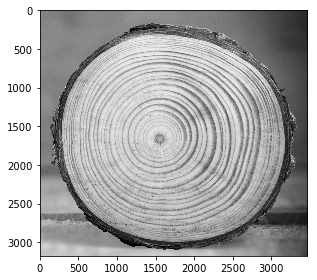

In [150]:
imshow(img11)

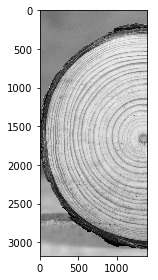

In [45]:
img11_half = rgb2gray(img11[:, 205:1600])
imshow(img11_half)

Возраст дерева = :  30


C:\Users\Vanya\Anaconda3\lib\site-packages\skimage\util\dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


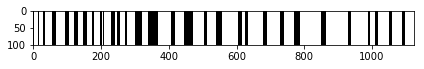

In [56]:
cut = img11_half[1600:1625, 75:1200]

cut = binary_erosion(\
             np.array(\
              [np.mean(\
                binary_dilation(\
                  rank.equalize(\
                   cut, square(30))>=175)\
                , axis = 0)]*100), square(1))

imshow(cut)

grouped_cut = np.array([[c, len(list(g))] for c, g in \
                   groupby(~cut[0], key=lambda key: key) if c==1])

print("Возраст дерева = : ", len(grouped_cut)-1)